In [1]:
import re
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [2]:
def get_coords(points, step):
    coords = []
    for point in points:
        x, y, dx, dy = point
        coords.append([int(x)+(int(dx)*step), int(y)+(int(dy)*step)])
    return coords

In [3]:
def count_neighbours(points):
    has_neighbour = [0]*len(points)
    for i, point_1 in enumerate(points):
        for point_2 in points:
            x1, y1 = point_1
            x2, y2 = point_2
            
            if(((x1 == x2) & abs(y1-y2) == 1) or ((y1 == y2) & abs(x1-x2) == 1)):
                has_neighbour[i] = 1
                
    return sum(has_neighbour)

def calculate_area(points):
    points = np.array(points)
    return (1 + points[:,0].max() - points[:,0].min()) * (1 + points[:,1].max() - points[:,1].min())

In [26]:
def show(points):
    points = np.array(points)
    points[:,0] -= points[:,0].min()
    points[:,1] -= points[:,1].min()
    plt.imshow(csr_matrix(([1]*len(points), (points[:,1], points[:,0]))).toarray())
    plt.show()

## Sample

In [4]:
sample = '''
position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>
'''

In [27]:
initial_points = [re.findall(r'-?\d+', line) for line in sample.split("\n") if line]

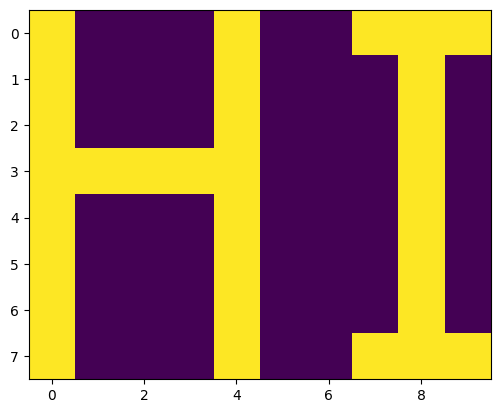

In [33]:
initial_points = [re.findall(r'-?\d+', line) for line in sample.split("\n") if line]
previous_area = calculate_area(get_coords(initial_points, 0))
i = 1
while True:
    points = get_coords(initial_points, i)
    area = calculate_area(points)
    if(area > previous_area):
        show(get_coords(initial_points, i-1))
        break
    i = i + 1
    previous_area = area

## Puzzle 1


10391


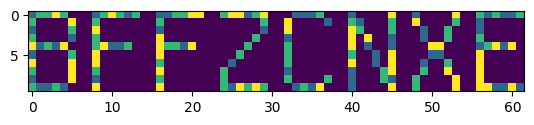

In [37]:
import aocd
instructions = aocd.get_data(day=10, year=2018)
initial_points = [re.findall(r'-?\d+', line) for line in instructions.split("\n") if line]
previous_area = calculate_area(get_coords(initial_points, 0))
i = 1
while True:
    points = get_coords(initial_points, i)
    area = calculate_area(points)
    if(area > previous_area):
        print(i-1)
        show(get_coords(initial_points, i-1))
        break
    i = i + 1
    previous_area = area